## Introduction to CNN

In mathematics (in particular, functional analysis), convolution is a mathematical operation on two functions (f and g) that produces a third function that expresses how the shape of one is modified by the other.

Convolutional Neural Network is a Deep Learning algorithm specially designed for working with Images and videos. It takes images as inputs, extracts and learns the features of the image, and classifies them based on the learned features.

Similarly, CNN has various filters, and each filter extracts some information from the image such as edges, different kinds of shapes (vertical, horizontal, round), and then all of these are combined to identify the image.

Now, the question here can be: Why can’t we use Artificial Neural Networks for the same purpose?  This is because there are some disadvantages with ANN:

It is too much computation for an ANN model to train large-size images and different types of image channels.

The next disadvantage is that it is unable to capture all the information from an image whereas a CNN model can capture the spatial dependencies of the image.

Another reason is that ANN is sensitive to the location of the object in the image i.e if the location or place of the same object changes, it will not be able to classify properly.

## Components of CNN

The CNN model works in two steps: feature extraction and Classification

Feature Extraction is a phase where various filters and layers are applied to the images to extract the information and features out of it and once it’s done it is passed on to the next phase i.e Classification where they are classified based on the target variable of the problem.

A typical CNN model looks like this:

Input layer

Convolution layer + Activation function

Pooling layer

Fully Connected Layer

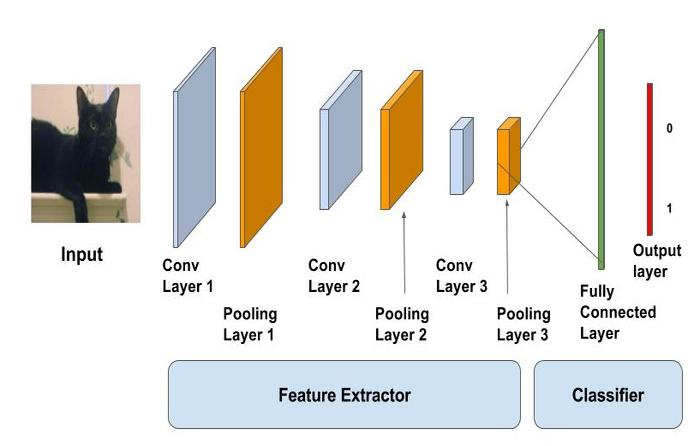

 Source: https://learnopencv.com/image-classification-using-convolutional-neural-networks-in-keras/

Let’s learn about each layer in detail.

## Input layer

As the name says, it’s our input image and can be Grayscale or RGB. Every image is made up of pixels that range from 0 to 255. We need to normalize them i.e convert the range between 0 to 1  before passing it to the model.

Below is the example of an input image of size 4*4 and has 3 channels i.e RGB and pixel values.

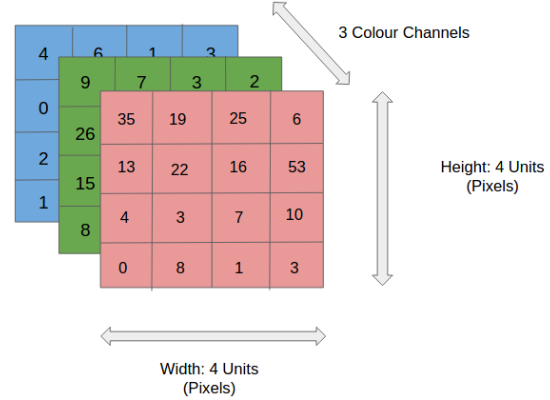

Source : https://medium.com/@raycad.seedotech/convolutional-neural-network-cnn-8d1908c010ab

## Convolution Layer

The convolution layer is the layer where the filter is applied to our input image to extract or detect its features. A filter is applied to the image multiple times and creates a feature map which helps in classifying the input image. Let’s understand this with the help of an example. For simplicity, we will take a 2D input image with normalized pixels.

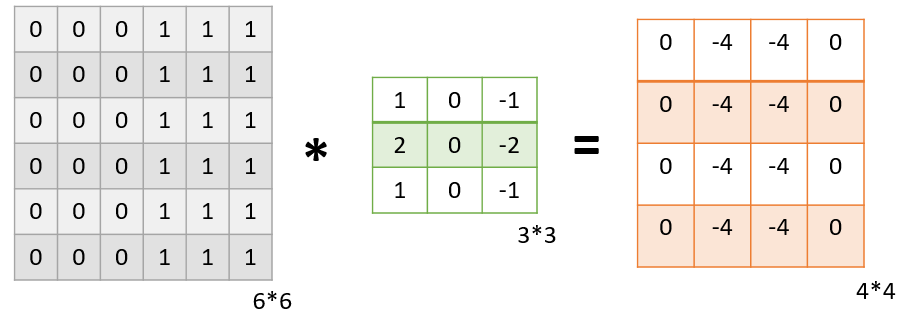

Let’s get into some maths behind getting the feature map in the above image.

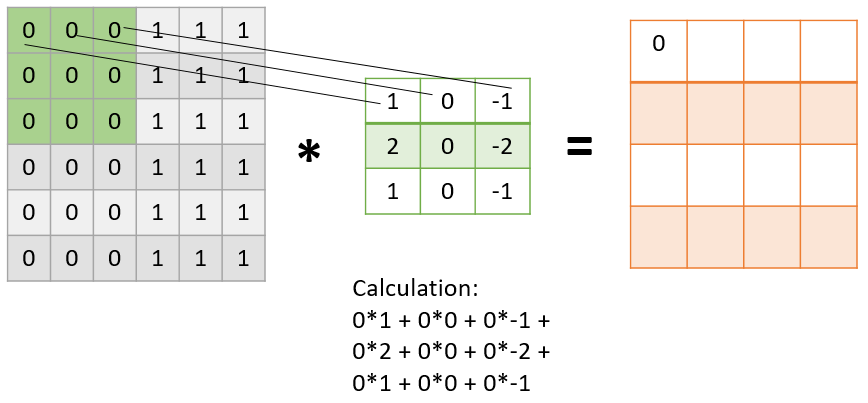

As presented in the above figure, in the first step the filter is applied to the green highlighted part of the image, and the pixel values of the image are multiplied with the values of the filter (as shown in the figure using lines) and then summed up to get the final value.

In the next step, the filter is shifted by one column as shown in the below figure. This jump to the next column or row is known as stride and in this example, we are taking a stride of 1 which means we are shifting by one column.

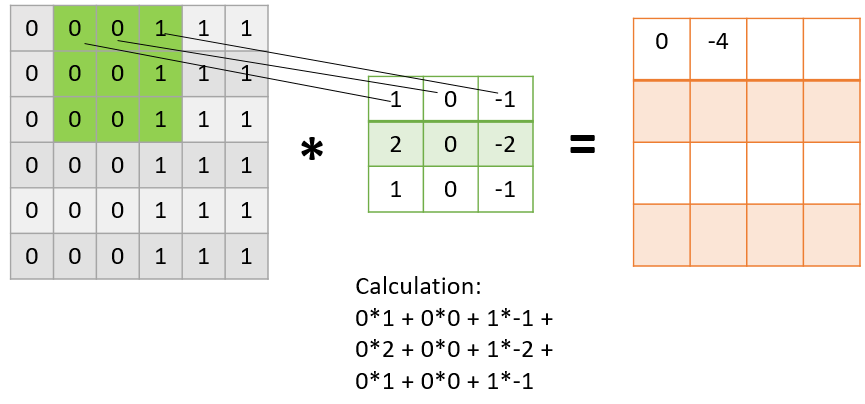

Similarly, the filter passes over the entire image and we get our final Feature Map. Once we get the feature map, an activation function is applied to it for introducing nonlinearity.

A point to note here is that the Feature map we get is smaller than the size of our image. As we increase the value of stride the size of the feature map decreases.

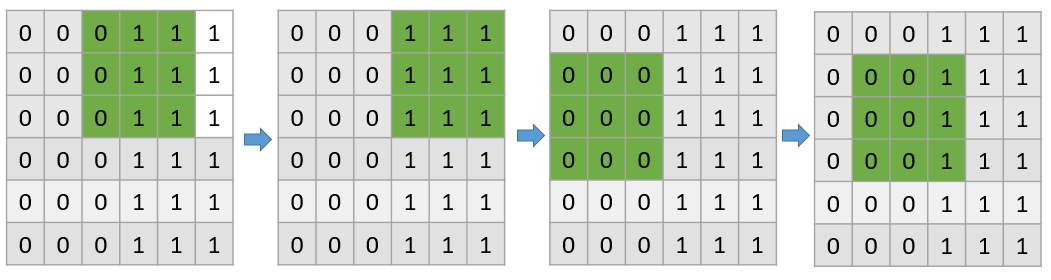

This is how a filter passes through the entire image with the stride of 1

### Pooling Layer

The pooling layer is applied after the Convolutional layer and is used to reduce the dimensions of the feature map which helps in preserving the important information or features of the input image and reduces the computation time.

Using pooling, a lower resolution version of input is created that still contains the large or important elements of the input image.

The most common types of Pooling are Max Pooling and Average Pooling. The below figure shows how Max Pooling works. Using the Feature map which we got from the above example to apply Pooling. Here we are using a Pooling layer of size 2*2 with a stride of 2.

The maximum value from each highlighted area is taken and a new version of the input image is obtained which is of size 2*2 so after applying Pooling the dimension of the feature map has reduced. 

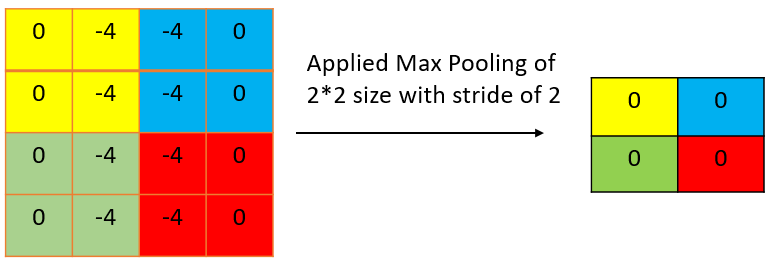

## Fully Connected Layer

Till now we have performed the Feature Extraction steps, now comes the Classification part. The Fully connected layer (as we have in ANN) is used for classifying the input image into a label. This layer connects the information extracted from the previous steps (i.e Convolution layer and Pooling layers) to the output layer and eventually classifies the input into the desired label.

The complete process of a CNN model can be seen in the below image.

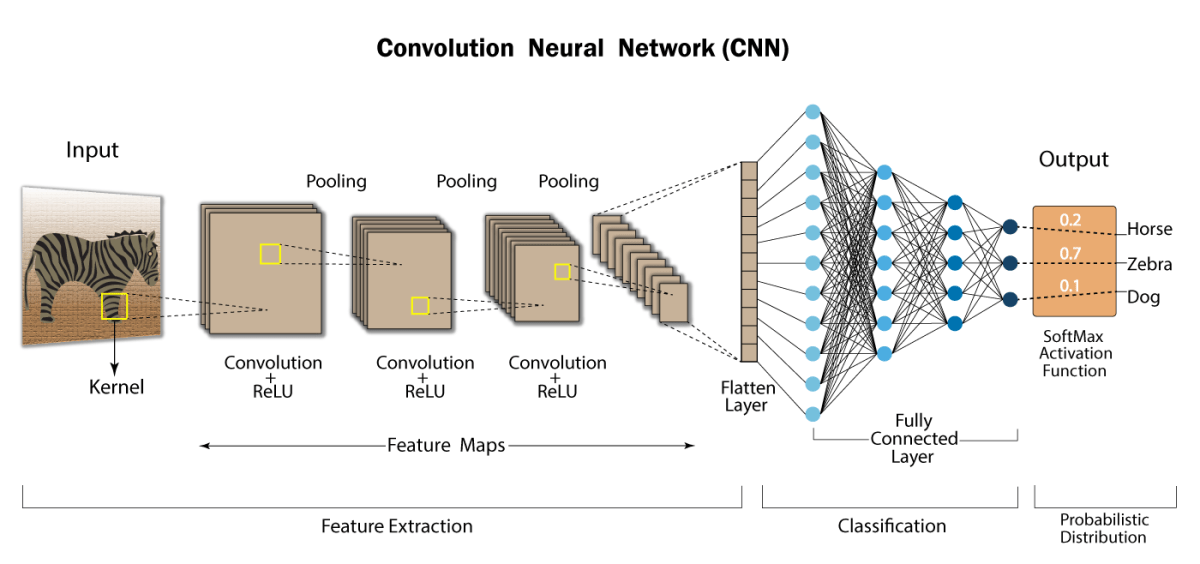

Source: https://developersbreach.com/convolution-neural-network-deep-learning/

## How to Implement CNN in Python?

We will be using the Mnist Digit classification dataset.

In [1]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [2]:
#loading data
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

# What is MNIST dataset

#It is a very popular dataset in the field of image processing. 
#It is often used for benchmarking machine learning algorithms. 
#MNIST is short for Modified National Institute of Standards and Technology database. 
#MNIST contains a collection of 70,000, 28 x 28 images of handwritten digits from 0 to 9.

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train.shape[0]

60000

In [5]:
y_train.shape

(60000,)

In [6]:
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [7]:
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [10]:
#normalizing the pixel values
X_train = X_train/255
X_test = X_test/255

In [11]:
#defining model
model = Sequential()

#There are various type of CNN for MNIST dataset. 
#In Tensorflow, there are various ways to define CNN model like sequential model, functional model, and sub-class model

In [12]:
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

# Number of images, shape of the convolutional kernel, activation function, input shape, 
#last once is for channel for grey images, else 3 for RGB images

#The (3,3) specifies the shape of the convolutional kernel. Check out the docs for more information.

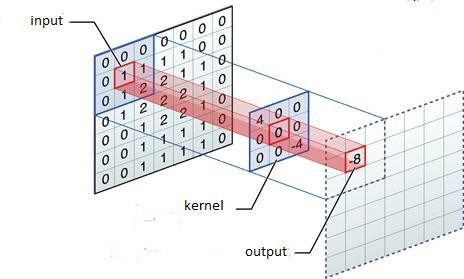

In [13]:
#adding pooling layer
model.add(MaxPool2D(2,2)) #Maxpool size is 2 x 2

In [14]:
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))

In [15]:
#adding output layer
model.add(Dense(10,activation='softmax'))

In [16]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
#fitting the model
model.fit(X_train,y_train,epochs=10)

#Model is being trained on 1875 batches of 32 images each, not 1875 images. 1875*32 = 60000 images

Epoch 1/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.7431 - accuracy: 0.7861
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.3236 - accuracy: 0.9041
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2761 - accuracy: 0.9178
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2369 - accuracy: 0.9293
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2077 - accuracy: 0.9374
Epoch 6/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1848 - accuracy: 0.9442
Epoch 7/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1684 - accuracy: 0.9486
Epoch 8/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1549 - accuracy: 0.9529
Epoch 9/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1443 - accuracy: 0.9564
Epoch 10/10
1875/1875 [==============================] - 49s 26m

In [18]:
#evaluting the model
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.1400 - accuracy: 0.9565


[0.13999362289905548, 0.9564999938011169]